In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from pathlib import Path



warnings.filterwarnings("ignore")

**Vorschlag Zielwert ZQ Synergy**

$PE(GFZ)= min( 1,63*(\frac{35.2}{GFZ+0,15}-27.3) ; 100) $     $[kWh_{PE}/m²_{BGF}a]$

In [2]:
# ZQ Austria Vorschlag

GFZ = np.linspace(0.0, 5, 500) #min, max, steps
from utils.targets import target



from utils.plotting import plot_context_factor

Text(0, 0.5, 'PE-Balance $[{kWh/m²_{BGF}a}]$')

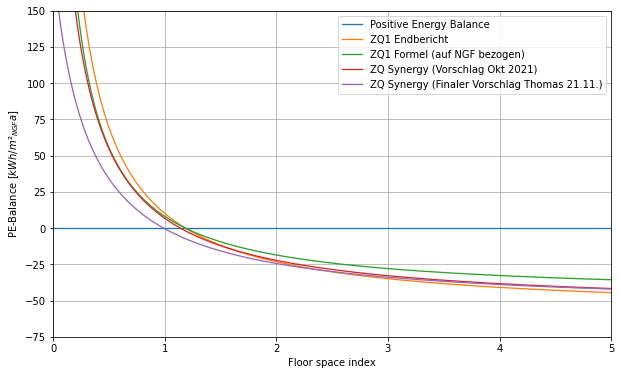

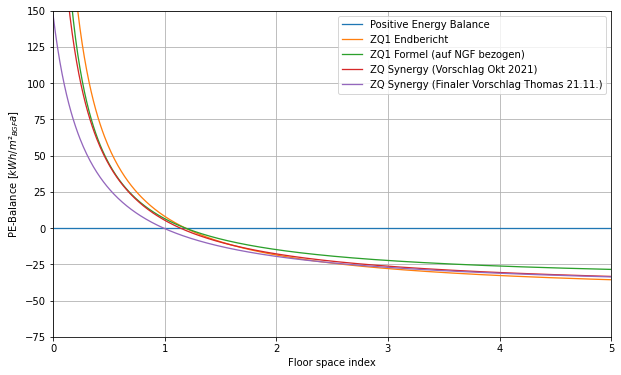

In [3]:
PEQ_alfa = pd.DataFrame({
    "Positive Energy Balance":np.zeros(len(GFZ)),
    "ZQ1 Endbericht":target(GFZ, A=37, dx=0.085,EUI=29.14, cutoff=None),
    "ZQ1 Formel (auf NGF bezogen)":
        target(GFZ, A=37, dx=0.085,EUI=29.14, fPE=1.63*0.8, cutoff=None),
    "ZQ Synergy (Vorschlag Okt 2021)": target(GFZ),
    "ZQ Synergy (Finaler Vorschlag Thomas 21.11.)": target(GFZ, dx=0.3),
    # "ZQ Synergy (Vorschlag Simon I 21.11.)": target(GFZ, dx=0.18, EUI=30),
    # "ZQ Synergy (Vorschlag Simon II 21.11.)": target(GFZ, dx=0.25, A=40, EUI=30),
}, index=GFZ)

PEQ_alfa_NGF = PEQ_alfa / 0.8



fig, ax = plt.subplots(1,1, figsize=(10,6))
plot_context_factor(ax, df=PEQ_alfa_NGF)
ax.set_ylabel("PE-Balance $[{kWh/m²_{NGF}a}]$")



fig, ax = plt.subplots(1,1, figsize=(10,6))
plot_context_factor(ax, df=PEQ_alfa)
ax.set_ylabel("PE-Balance $[{kWh/m²_{BGF}a}]$")


In [4]:
PEQ_alfa_NGF


,Positive Energy Balance,ZQ1 Endbericht,ZQ1 Formel (auf NGF bezogen),ZQ Synergy (Vorschlag Okt 2021),ZQ Synergy (Finaler Vorschlag Thomas 21.11.)
0.00000,0.0,827.539015,662.031212,375.000000,183.442917
0.01002,0.0,734.012518,587.210015,375.000000,175.716134
0.02004,0.0,658.329482,526.663586,366.159161,168.473182
0.03006,0.0,595.828199,476.662559,342.687658,161.669996
0.04008,0.0,543.340740,434.672592,321.690747,155.267706
...,...,...,...,...,...
4.95992,0.0,-44.429500,-35.543600,-41.588305,-41.988561
4.96994,0.0,-44.459121,-35.567296,-41.615773,-42.014487
4.97996,0.0,-44.488624,-35.590899,-41.643134,-42.040314
4.98998,0.0,-44.518012,-35.614409,-41.670388,-42.066043


Specify excel path

In [34]:
leihgeraet = Path(r"C:\Users\lektor\nextcloud")
beehive = Path(r"C:\Users\Simon Schneider\Nextcloud")

# locate nextcloud
local_nextcloud = leihgeraet
nc_path = r"EE\1_Forschung\2_Laufend\Plusenergie-Campus Energybase 2.0 (Sdz 9)\4_Quartier\PEExcel_final\PEC Varianten.xlsx"
path = Path(local_nextcloud,nc_path)
df = pd.read_excel(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Columns: 380 entries, Name to Umweltenergiepotential Straße/Gehweg [MWh/a]
dtypes: bool(13), float64(255), int64(90), object(22)
memory usage: 2.6+ MB


Identify the required columns

In [35]:
print(df.columns)

Index(['Name', 'Quartier', 'depth', 'Linie', 'Forschungsprojekt', 'Land',
       'Stadt', 'Variante', 'Mikroquartier', 'Generation',
       ...
       'Primärenergiesaldo ohne Dichteausgleich [kWh/m²NGFa]2',
       'PE-Saldo Ziel NGF [kWh/m²NGFa]2',
       'PE-Anforderung erreicht? Werte inkl. Dichtebonus [kWh/m²NGFa]2',
       'PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa]2',
       'PE-Saldo Ziel BGF real (NGF/BGF=0,85) [kWh/m²BGFa]2',
       'Heizenergie [MWh/a]', 'Kühlenergie [MWh/a]',
       'Umweltenergiepotential Freifläche [MWh/a]',
       'Umweltenergiepotential Innenhof [MWh/a]',
       'Umweltenergiepotential Straße/Gehweg [MWh/a]'],
      dtype='object', length=380)


In [36]:
available = set(df.columns)

PEB_varname = "Primärenergiesaldo ohne Dichteausgleich [kWh/m²NGFa]2"
PEB_Zielwert_varname = "PE-Saldo Ziel NGF [kWh/m²NGFa]2"
GFZ_varname = "GFZ [-]"

required = {
    "Name",

    "Mikroquartier",
    "Gebäudehülle",
    "Lüftung mit WRG",
    "PV",
    "JAZ",
    "Reduktion Nutzerstrom",
    "ecars",
    "WPS",
    "Klima",

    GFZ_varname,
    PEB_varname,
    PEB_Zielwert_varname,
    'Heizenergie [MWh/a]',
    'Kühlenergie [MWh/a]',
    # 'Umweltenergiepotential auf Grundstück [MWh/a]',

}
missing = required - available
print("missing columns:")
for miss in missing:
    print(miss)


missing columns:


In [37]:
for c in df.columns:
    if "PE" in c:
        print(c)

PEBedarf [kWh/m²NGFa]43
CO2,PE Profil
PEBedarf [kWh/m²NGFa]
PEExport [kWh/m²NGFa]
PESaldo [kWh/m²NGFa]
PEBedarf [kWh/m²NGFa]45
PEExport [kWh/m²NGFa]46
PESaldo [kWh/m²NGFa]47
PEBedarf [kWh/m²NGFa]57
PEExport [kWh/m²NGFa]58
PESaldo [kWh/m²NGFa]59
PE-Saldo Ziel NGF [kWh/m²NGFa]
PE-Anforderung erreicht? Werte inkl. Dichtebonus [kWh/m²NGFa]
PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa]
PE-Saldo Ziel BGF real (NGF/BGF=0,85) [kWh/m²BGFa]
PEBedarf [kWh/m²NGFa]2
PEExport [kWh/m²NGFa]2
PESaldo [kWh/m²NGFa]2
PE-Saldo Ziel NGF [kWh/m²NGFa]2
PE-Anforderung erreicht? Werte inkl. Dichtebonus [kWh/m²NGFa]2
PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa]2
PE-Saldo Ziel BGF real (NGF/BGF=0,85) [kWh/m²BGFa]2


ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 907 and the vector passed to `x` has length 500.

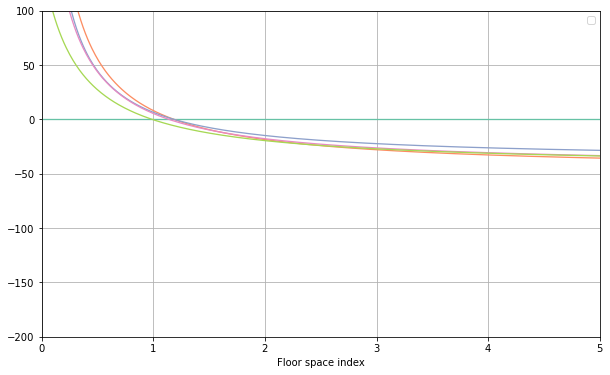

In [38]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plot_context_factor(ax, df=PEQ_alfa, ylims=(-200,100))
sns.set_palette("Set2") #"Reds"
sns.scatterplot(ax=ax,
                x=GFZ,
                y=PEB_varname,
                hue="Mikroquartier",
                data=df)

In [20]:
subplot_columns = [
    "Mikroquartier",
    "Gebäudehülle",
    "Lüftung mit WRG",
    "PV",
    "JAZ",
    "Reduktion Nutzerstrom",
    "ecars",
    "WPS",
    "Klima"]

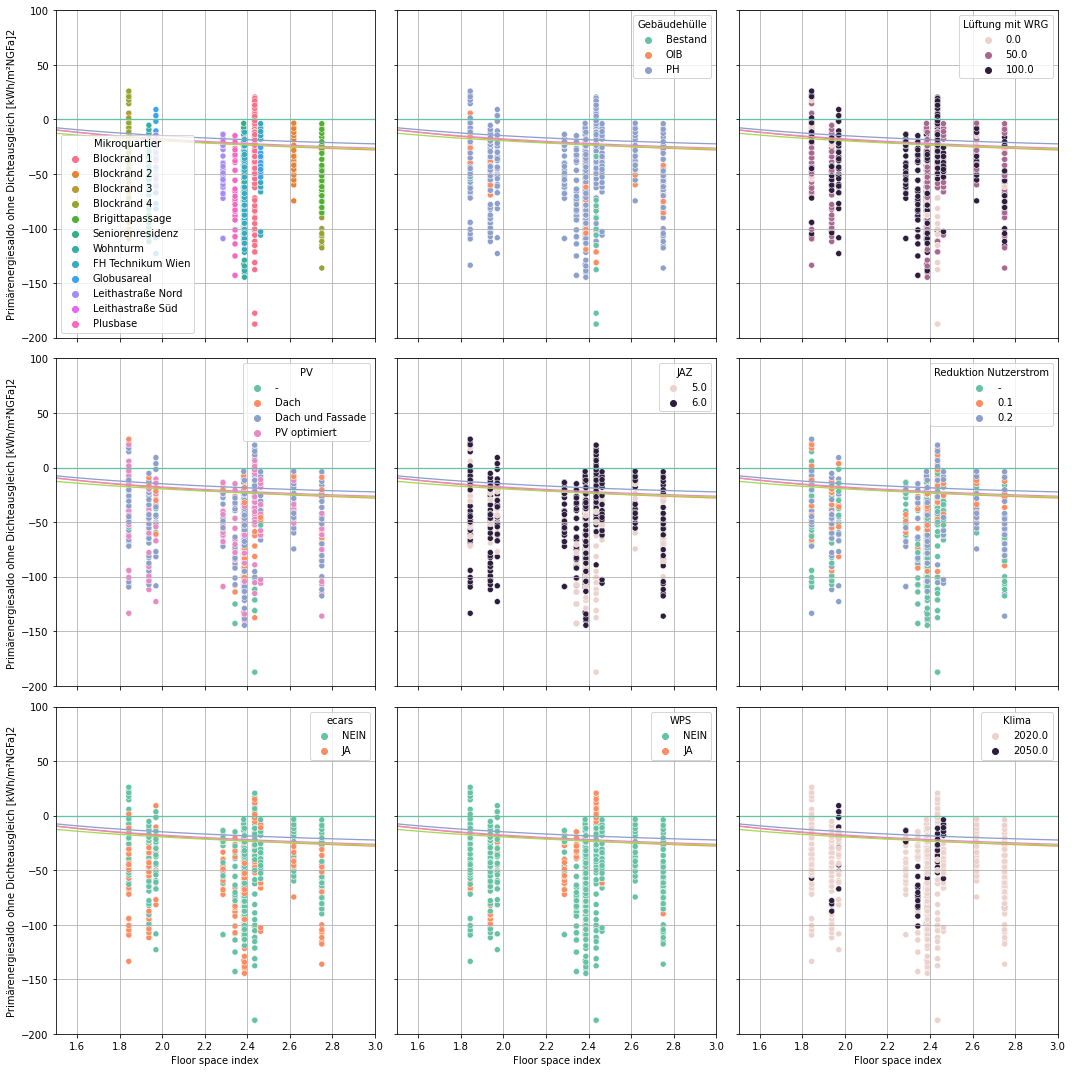

In [39]:
fig, axes = plt.subplots(3,3, figsize=(15,15), sharex=True, sharey=True)
for ax, category in zip(axes.flatten(), subplot_columns):
    plot_context_factor(ax,
                        df=PEQ_alfa,
                        ylims=(-200,100),
                        xlims=(1.5,3),
                        no_legend=True
                        )
    sns.scatterplot(ax=ax,
                    x=GFZ_varname,
                    y=PEB_varname,
                    hue=category,
                    data=df)
plt.tight_layout()

In [41]:
dfmin = df[required]
dfmin.columns


Index(['Kühlenergie [MWh/a]', 'JAZ', 'Lüftung mit WRG',
       'Primärenergiesaldo ohne Dichteausgleich [kWh/m²NGFa]2',
       'Heizenergie [MWh/a]', 'PV', 'Gebäudehülle', 'Name',
       'Reduktion Nutzerstrom', 'Mikroquartier', 'WPS',
       'PE-Saldo Ziel NGF [kWh/m²NGFa]2', 'Klima', 'ecars', 'GFZ [-]'],
      dtype='object')

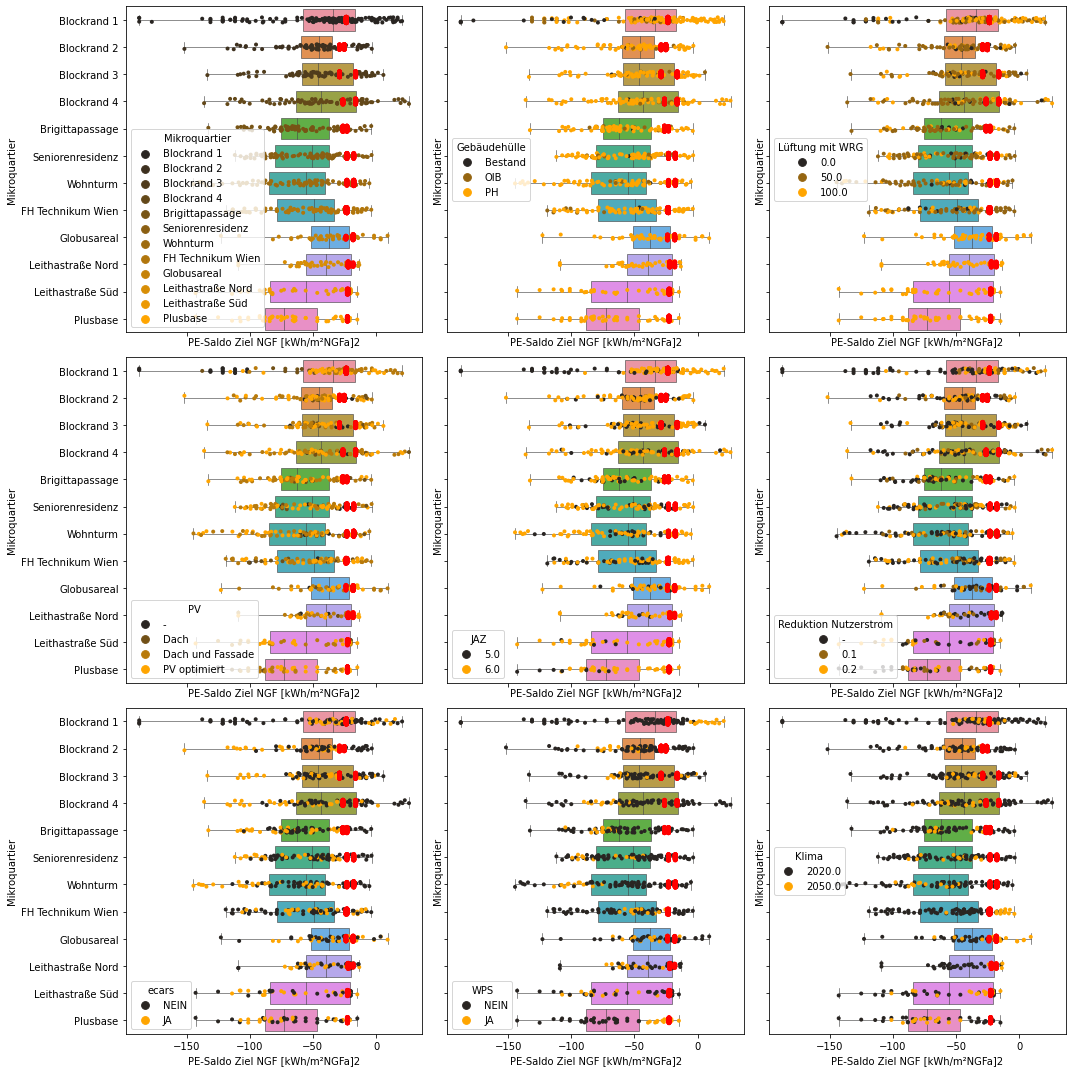

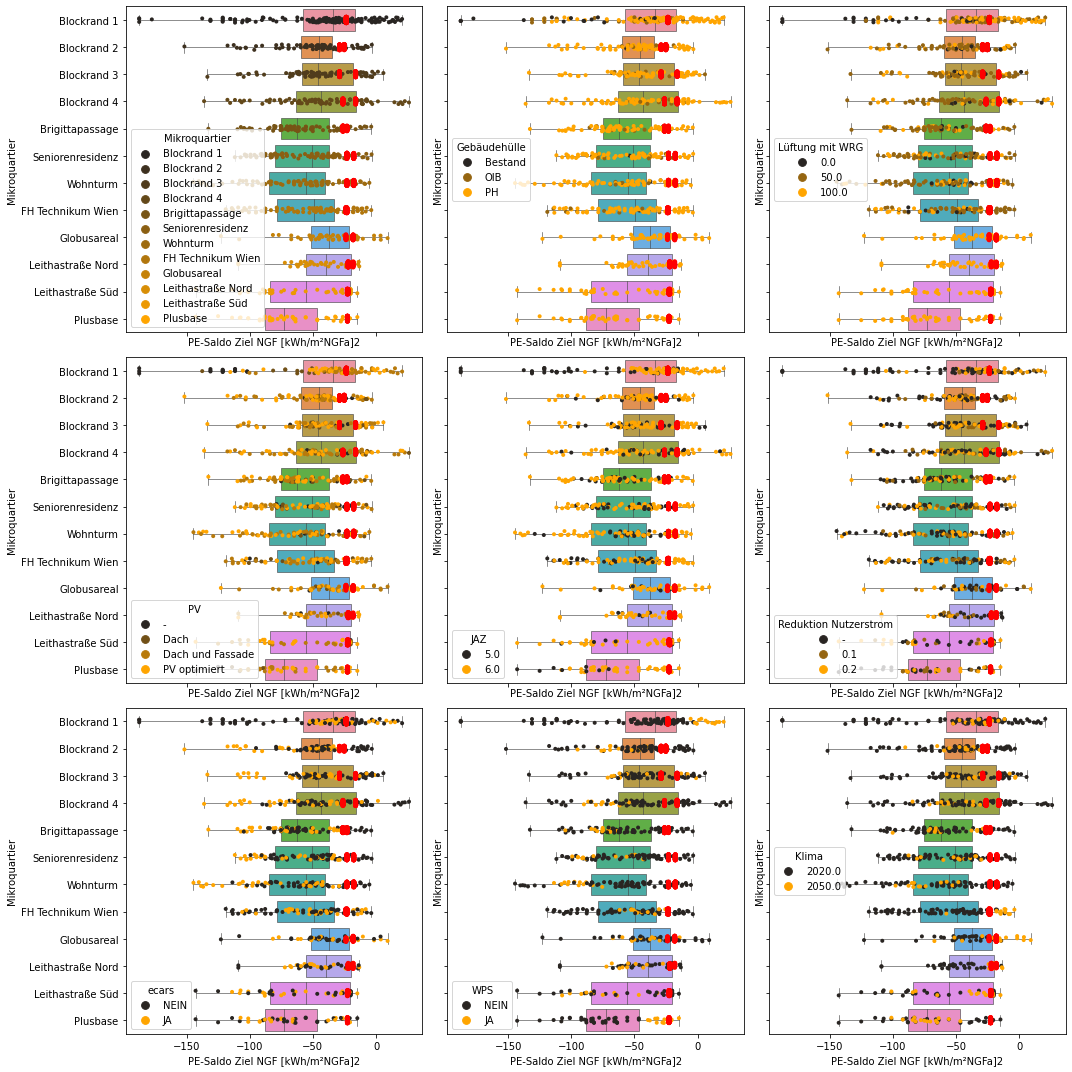

In [43]:
fig, axes = plt.subplots(3,3, figsize=(15,15), sharex=True, sharey=True)
for ax, category in zip(axes.flatten(), subplot_columns):
    sns.boxplot(ax=ax, data=dfmin,
                x=PEB_varname, y="Mikroquartier",
                whis=[0, 100], width=.8, linewidth=0.6
                )

    sns.stripplot(ax=ax, x=PEB_varname, y="Mikroquartier",
              data=dfmin, hue=category, color="orange",
              size=4, linewidth=0)

    sns.stripplot(ax=ax, x=PEB_Zielwert_varname, y="Mikroquartier",
              data=dfmin, color="red",
              size=5, linewidth=0)
plt.tight_layout()

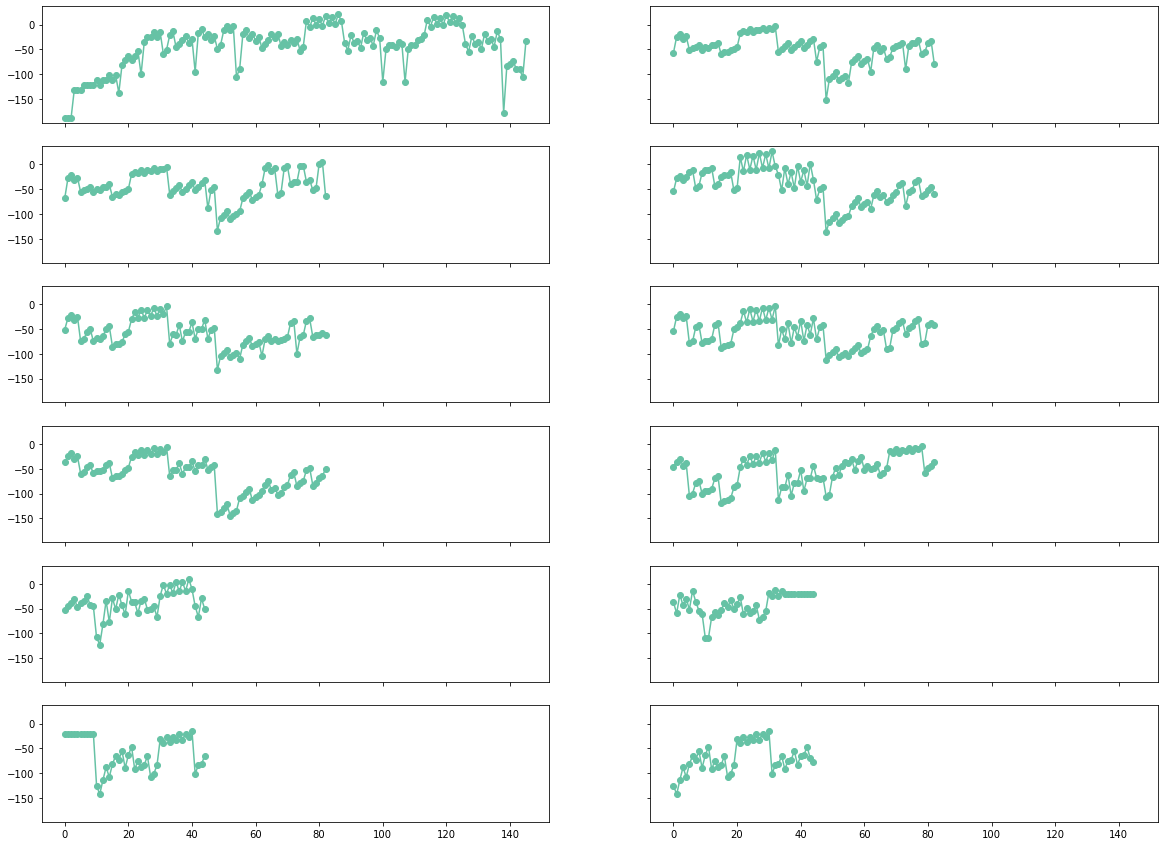

In [44]:
fig, axes = plt.subplots(6,2, figsize=(20,15), sharex=True, sharey=True)
for ax, mqs in zip(axes.flatten(), dfmin.Mikroquartier.unique()):
    ax.plot(np.arange(len(dfmin[dfmin.Mikroquartier==mqs])), PEB_varname,
    data=dfmin[dfmin.Mikroquartier==mqs], linestyle='-', marker='o')


In [ ]:
b1 = dfmin[dfmin.Mikroquartier=="Blockrand 1"]
mq_count = 2 #dfmin.Mikroquartier.unique()
cat_count = len(subplot_columns[:3])

fig, axes = plt.subplots(mq_count,cat_count, figsize=(20,15))
for axcol, cat in enumerate(subplot_columns[:3]):
    sns.catplot(ax=axes[0, axcol],
                x=cat,
                y=PEB_varname,
                order=b1[cat].unique(),
                data=b1)
